In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

#mission: predict if the client will subscribe (yes/no) a term deposit (variable y).
# Load Training and Test Data Sets
headers = ['age', 'job', 'marital', 
           'education', 'default', 
           'housing', 'loan', 
           'contact', 'month', 'day_of_week', 
           'duration', 'campaign', 
           'pdays', 'previous', 
           'poutcome','emp.var.rate','cons.price.idx',
           'cons.conf.idx','euribor3m','nr.employed','y']
training_raw = pd.read_csv('dataset/bank-additional-full.csv', 
                       header=None, 
                       names=headers, 
                       sep=';', 
                       na_values=["?"], 
                       engine='python',
                          skiprows=1,
                          index_col=False)
test_raw = pd.read_csv('dataset/bank-additional.csv', 
                      header=None, 
                      names=headers, 
                      sep=';', 
                      na_values=["?"], 
                      engine='python', 
                      skiprows=1,
                      index_col=False)

In [2]:
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)
dataset_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# all number features
dataset_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,40.032203,258.148917,2.564835,962.288785,0.174543,0.082166,93.576032,-40.502282,3.621297,5166.985525
std,10.411407,258.864200,2.752261,187.370863,0.499364,1.570231,0.578881,4.625101,1.734350,72.380791
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# all kind features
dataset_raw.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,45307,45307,45307,45307,45307,45307,45307,45307,45307,45307,45307
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,11434,27437,13432,35903,23751,37299,28796,15147,9483,39086,40216


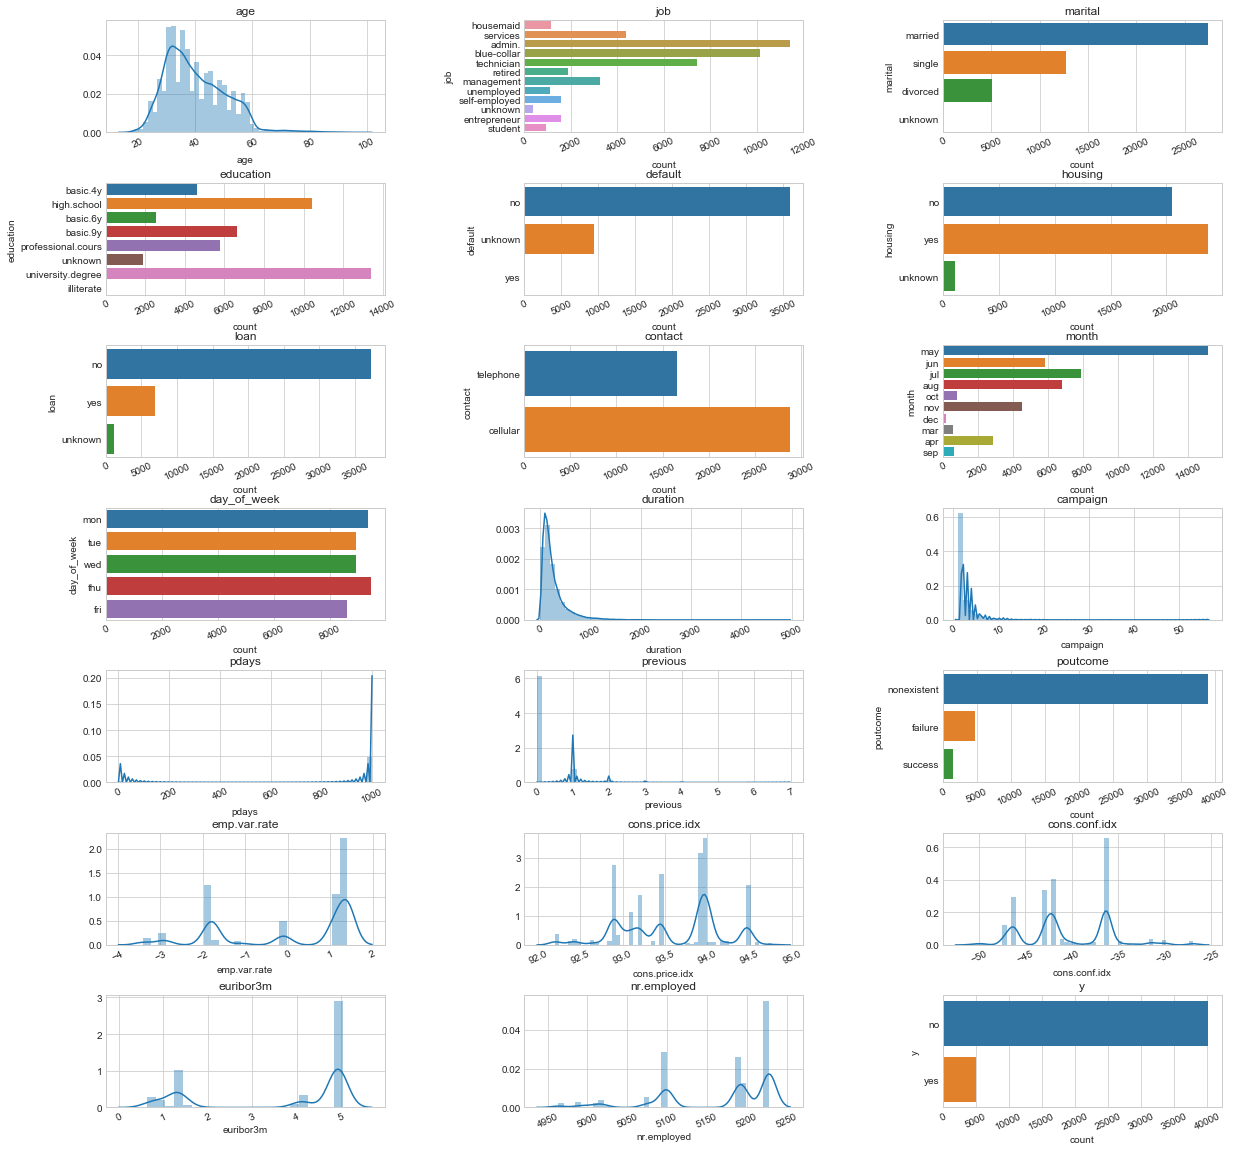

In [5]:
# single feature
import math
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(dataset_raw, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

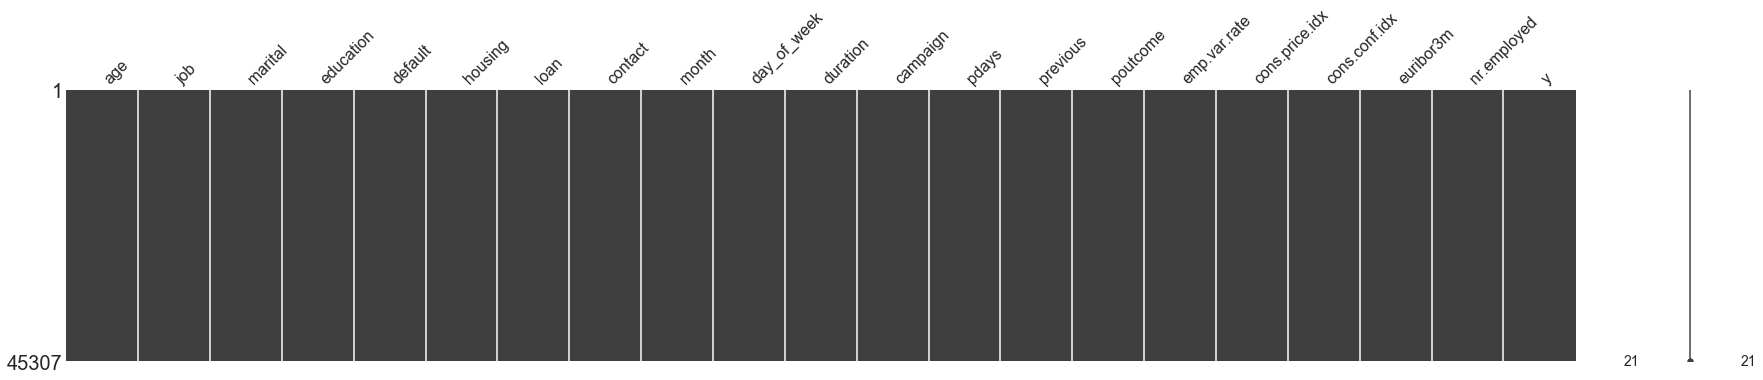

In [6]:
# show missing data
missingno.matrix(dataset_raw, figsize = (30,5))

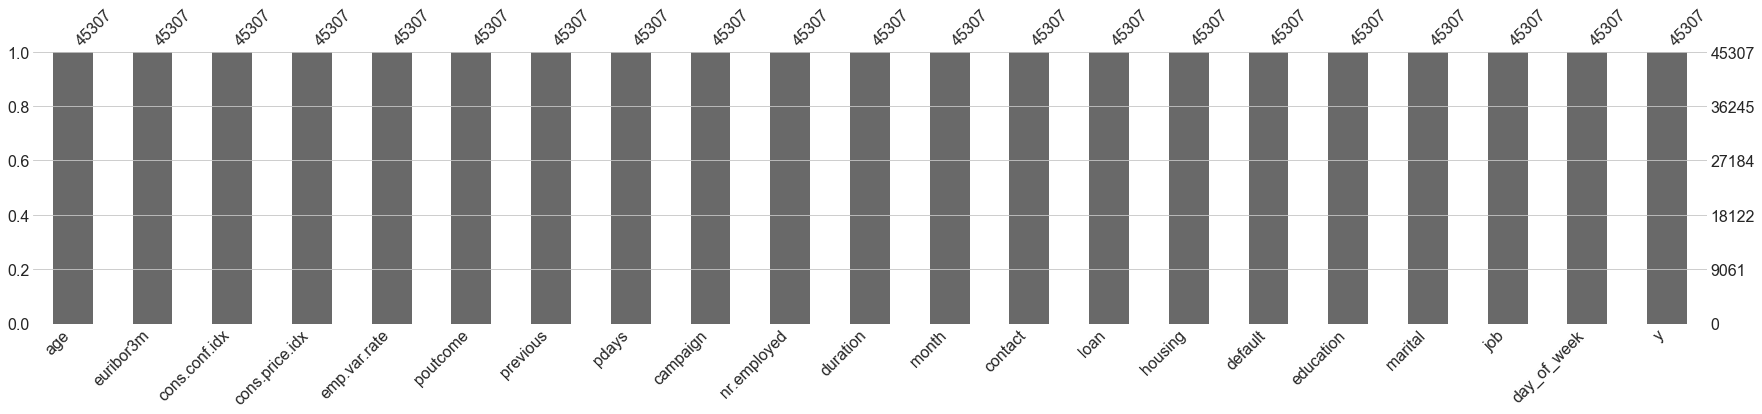

In [7]:
missingno.bar(dataset_raw, sort='ascending', figsize = (30,5))

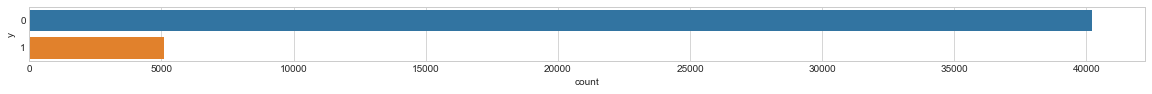

In [8]:
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables 

# Let's fix the Class Feature
dataset_raw.loc[dataset_raw['y'] == 'yes', 'y'] = 1
dataset_raw.loc[dataset_raw['y'] == 'no', 'y'] = 0

dataset_bin['y'] = dataset_raw['y']
dataset_con['y'] = dataset_raw['y']

#data unbalanced
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="y", data=dataset_bin);

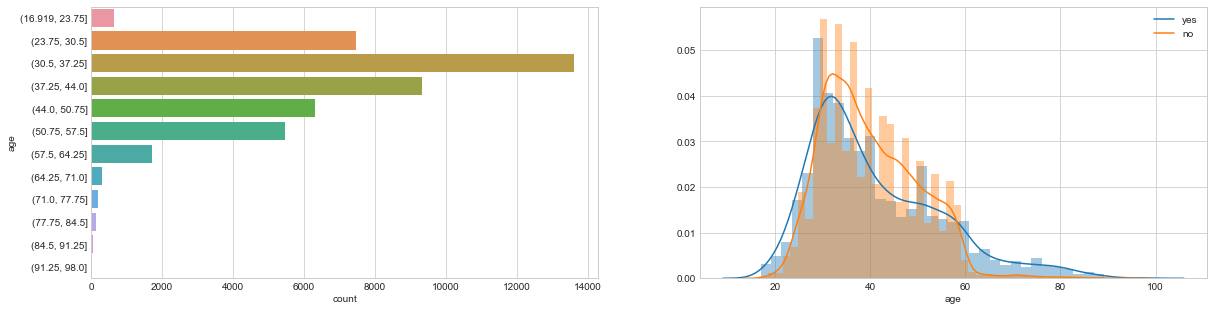

In [9]:
#Feature:age
dataset_bin['age'] = pd.cut(dataset_raw['age'], 12) 
dataset_con['age'] = dataset_raw['age'] # non-discretised

#left is the result, right is the result after cut
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con.loc[dataset_con['y'] == 1]['age'], kde_kws={"label": "yes"});
sns.distplot(dataset_con.loc[dataset_con['y'] == 0]['age'], kde_kws={"label": "no"});

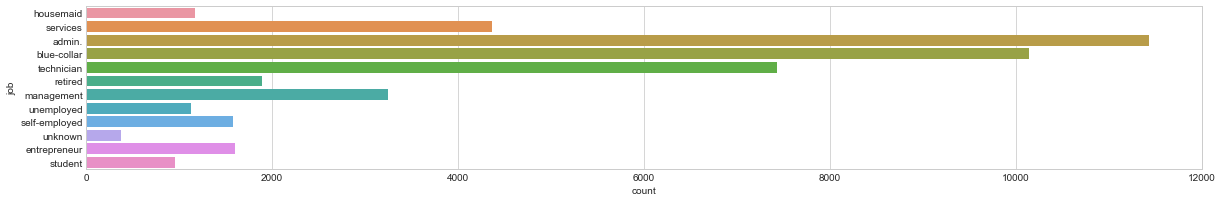

In [10]:
#Feature:job
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="job", data=dataset_raw);

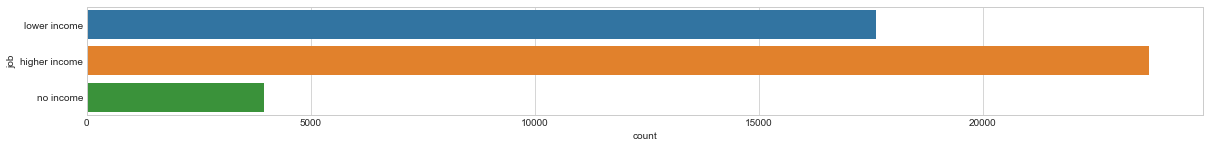

In [11]:
# merge some kinds
dataset_raw.loc[dataset_raw['job'] == 'housemaid', 'job'] = 'lower income'
dataset_raw.loc[dataset_raw['job'] == 'services', 'job'] = 'lower income'
dataset_raw.loc[dataset_raw['job'] == 'blue-collar', 'job'] = 'lower income'
dataset_raw.loc[dataset_raw['job'] == 'unknown', 'job'] = 'lower income'
dataset_raw.loc[dataset_raw['job'] == 'self-employed', 'job'] = 'lower income'

dataset_raw.loc[dataset_raw['job'] == 'retired', 'job'] = 'no income'
dataset_raw.loc[dataset_raw['job'] == 'student', 'job'] = 'no income'
dataset_raw.loc[dataset_raw['job'] == 'unemployed', 'job'] = 'no income'

dataset_raw.loc[dataset_raw['job'] == 'admin.', 'job'] = 'higher income'
dataset_raw.loc[dataset_raw['job'] == 'technician', 'job'] = 'higher income'
dataset_raw.loc[dataset_raw['job'] == 'management', 'job'] = 'higher income'
dataset_raw.loc[dataset_raw['job'] == 'entrepreneur', 'job'] = 'higher income'

dataset_bin['job'] = dataset_raw['job']
dataset_con['job'] = dataset_raw['job']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,2)) 
sns.countplot(y="job", data=dataset_bin);

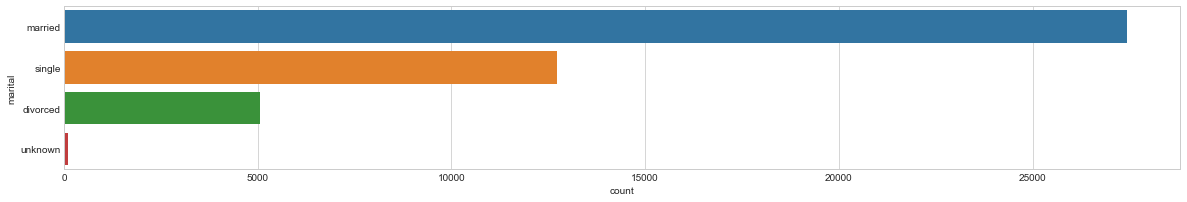

In [12]:
#feature marital
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital", data=dataset_raw);

In [13]:
dataset_bin['marital'] = dataset_raw['marital']
dataset_con['marital'] = dataset_raw['marital']

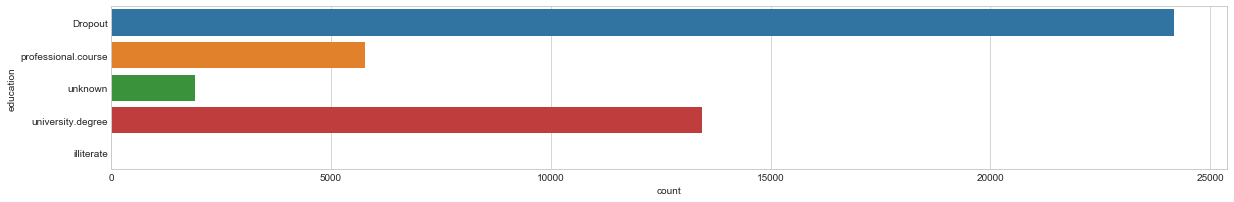

In [14]:
#feature education
dataset_raw.loc[dataset_raw['education'] == 'basic.4y', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'high.school' , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'basic.6y' , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'basic.9y' , 'education'] = 'Dropout'


dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="education", data=dataset_raw)

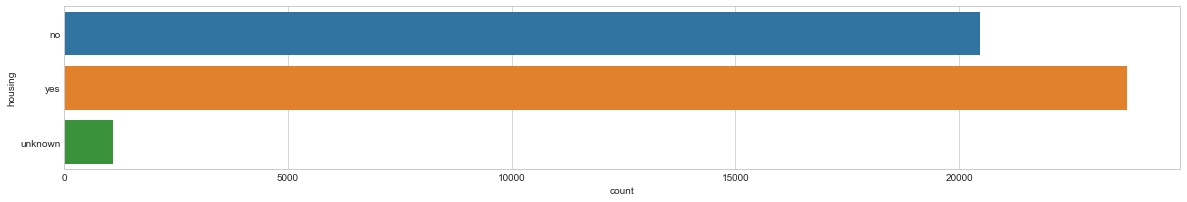

In [15]:
#feature housing
dataset_bin['housing'] = dataset_raw['housing']
dataset_con['housing'] = dataset_raw['housing']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="housing", data=dataset_raw)

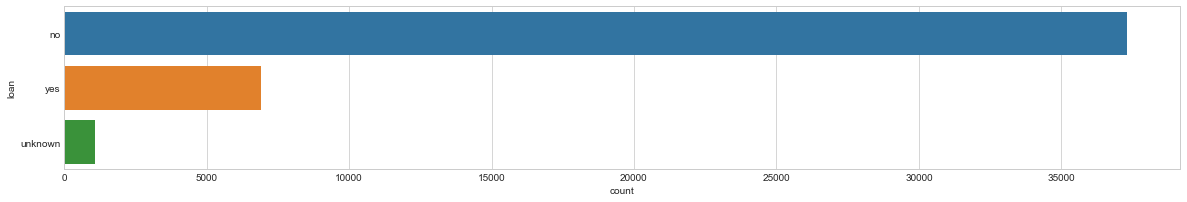

In [16]:
#feature loan
dataset_bin['loan'] = dataset_raw['loan']
dataset_con['loan'] = dataset_raw['loan']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="loan", data=dataset_raw)

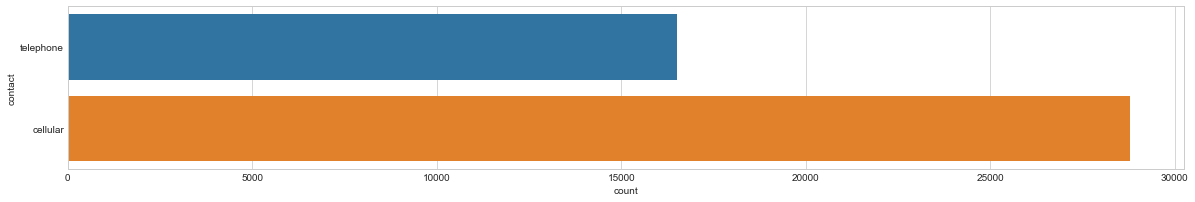

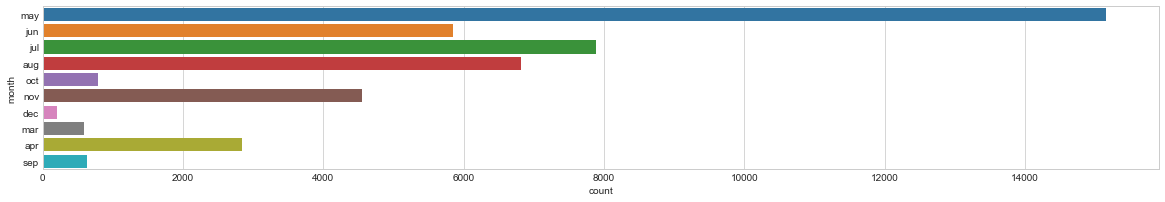

In [17]:
#feature contact
dataset_bin['contact'] = dataset_raw['contact']
dataset_con['contact'] = dataset_raw['contact']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="contact", data=dataset_raw)

#feature month
dataset_bin['month'] = dataset_raw['month']
dataset_con['month'] = dataset_raw['month']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,3)) 
sns.countplot(y="month", data=dataset_raw)

In [18]:
# One Hot Encodes 
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('y')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)

dataset_bin_enc.head()

,y,"age_(16.919, 23.75]","age_(23.75, 30.5]","age_(30.5, 37.25]","age_(37.25, 44.0]","age_(44.0, 50.75]","age_(50.75, 57.5]","age_(57.5, 64.25]","age_(64.25, 71.0]","age_(71.0, 77.75]",...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Label Encode 
dataset_con_test = dataset_con

dataset_con_enc = dataset_con_test.apply(LabelEncoder().fit_transform)

dataset_con_enc.head()

,y,age,job,marital,education,housing,loan,contact,month
0,0,39,1,1,0,0,0,1,6
1,0,40,1,1,0,0,0,1,6
2,0,20,1,1,0,2,0,1,6
3,0,23,0,1,0,0,0,1,6
4,0,39,1,1,0,0,2,1,6


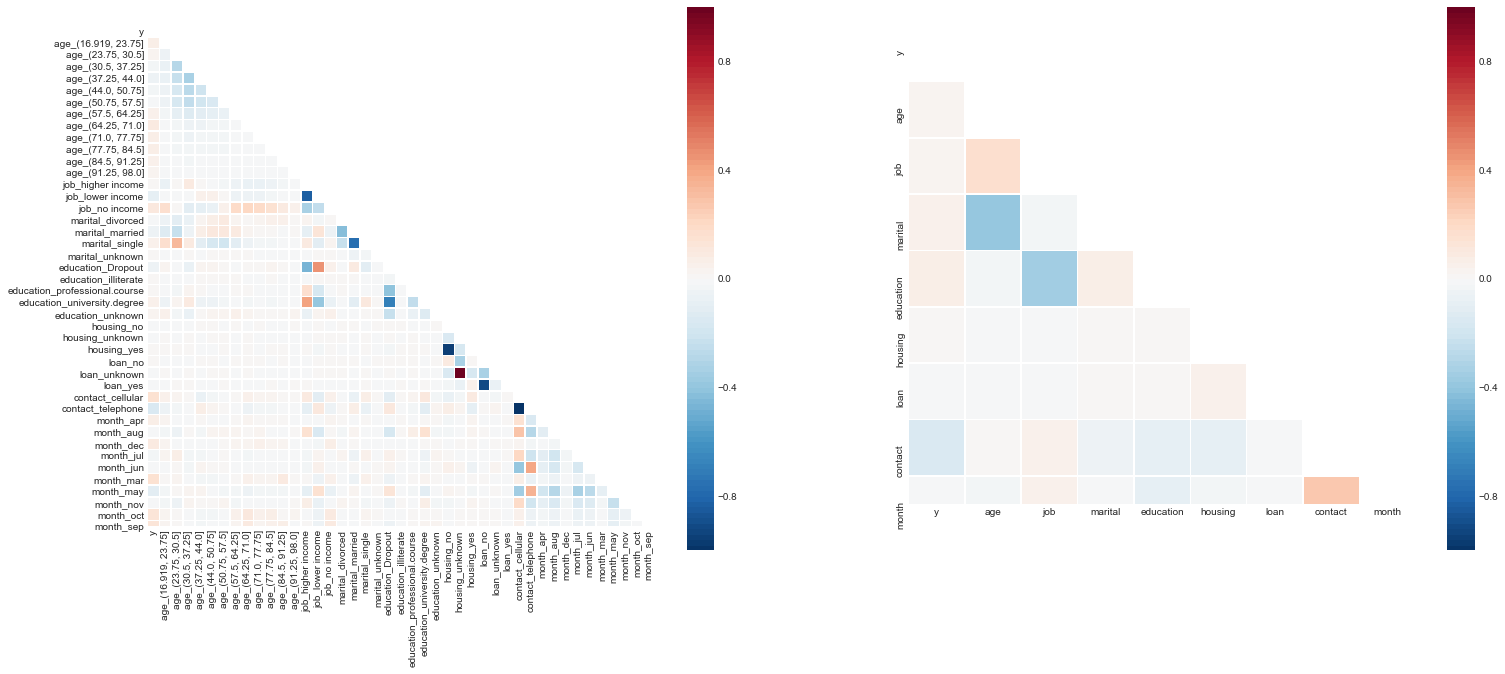

In [20]:
# relation graph.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 2, 1)

mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

plt.subplot(1, 2, 2)
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

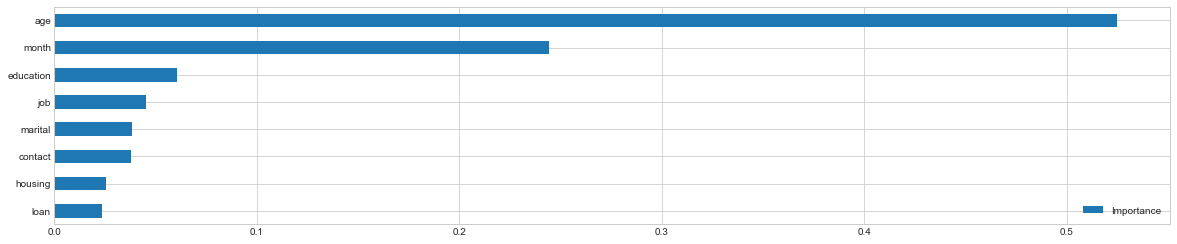

In [21]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_con_enc.drop('y', axis=1), dataset_con_enc['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

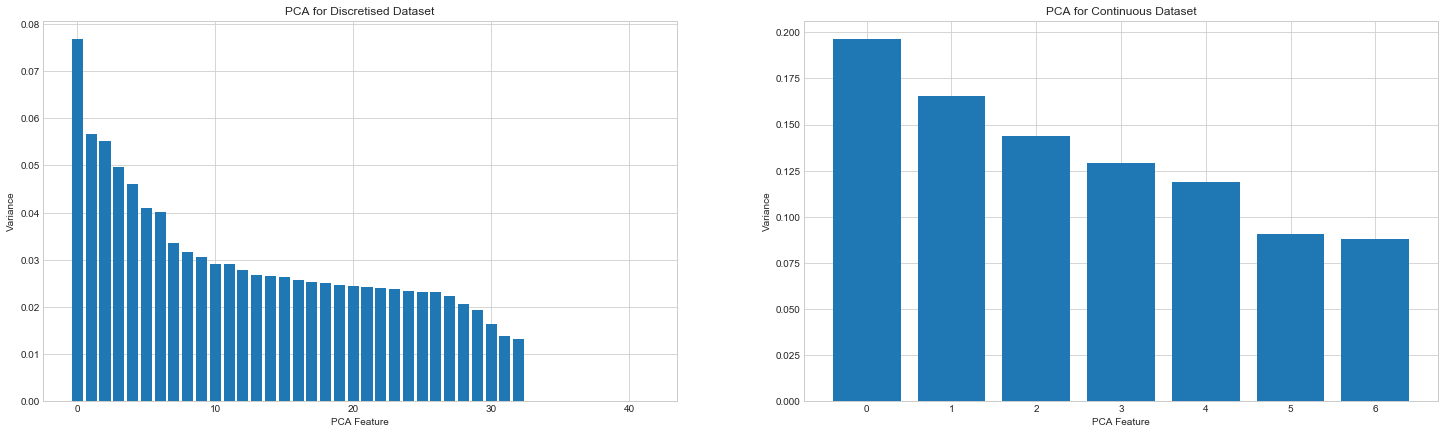

In [22]:
#PCA
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(dataset_bin_enc.drop('y', axis=1))
X = std_scale.transform(dataset_bin_enc.drop('y', axis=1))
pca1 = PCA(n_components=len(dataset_bin_enc.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('y', axis=1))
X = std_scale.transform(dataset_con_enc.drop('y', axis=1))
pca2 = PCA(n_components=len(dataset_con_enc.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

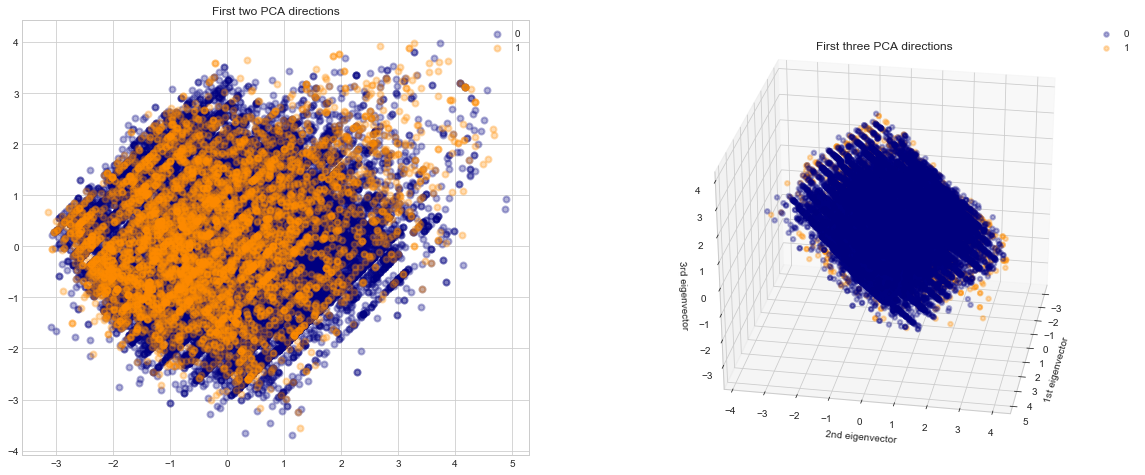

In [23]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(dataset_con_enc.drop('y', axis=1))
X = std_scale.transform(dataset_con_enc.drop('y', axis=1))
y = dataset_con_enc['y']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [24]:
# OPTIONS: 
# - dataset_bin_enc
# - dataset_con_enc
selected_dataset = dataset_bin_enc
selected_dataset.head(2)

,y,"age_(16.919, 23.75]","age_(23.75, 30.5]","age_(30.5, 37.25]","age_(37.25, 44.0]","age_(44.0, 50.75]","age_(50.75, 57.5]","age_(57.5, 64.25]","age_(64.25, 71.0]","age_(71.0, 77.75]",...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Splitting the Training and Test data sets
train = selected_dataset.loc[0:43000,:]
test = selected_dataset.loc[43000:,:]

# Given missing fields are a small percentange of the overall dataset, 
# we have chosen to delete them.
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [26]:
#rename
X_train_w_label = train
X_train = train.drop(['y'], axis=1)
y_train = train['y'].astype('int64')
X_test  = test.drop(['y'], axis=1)
y_test  = test['y'].astype('int64')

In [27]:
X_train.shape

(43001, 42)

In [28]:
X_train.head()

,"age_(16.919, 23.75]","age_(23.75, 30.5]","age_(30.5, 37.25]","age_(37.25, 44.0]","age_(44.0, 50.75]","age_(50.75, 57.5]","age_(57.5, 64.25]","age_(64.25, 71.0]","age_(71.0, 77.75]","age_(77.75, 84.5]",...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [30]:
import random
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.
random.seed(1)

# 在不同阈值上计算fpr
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
# 返回结果
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
import time
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 5.69 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.888 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.914346490339981e-14, 'class_weight': None, 'C': 1.4213965975708958e-13}

Model with rank: 1
Mean validation score: 0.888 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.716710769288114, 'class_weight': 'balanced', 'C': 1.0209415996414963e-10}

Model with rank: 3
Mean validation score: 0.703 (std: 0.263)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.0006048924554977594, 'class_weight': None, 'C': 3.59546922289169e+17}

Model with rank: 3
Mean validation score: 0.703 (std: 0.263)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4.666238114037979e-11, 'class_weight': None, 'C': 63500958.10994966}

Model with rank: 5
Mean validation score: 0.405 (std: 0.279)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.1692032674274776e-11, 'class_weight': 'balanced', 'C': 3.13797634170

In [31]:
# Logistic Regression
import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 88.6
Accuracy CV 10-Fold: 82.97
Running Time: 0:00:00.732652


In [32]:
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     38173
           1       0.13      0.09      0.11      4828

    accuracy                           0.83     43001
   macro avg       0.51      0.51      0.51     43001
weighted avg       0.80      0.83      0.82     43001



In [33]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2044
           1       0.50      0.09      0.15       263

    accuracy                           0.89      2307
   macro avg       0.70      0.54      0.55      2307
weighted avg       0.85      0.89      0.85      2307



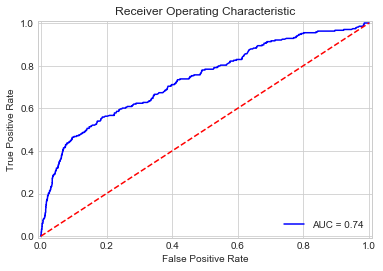

In [34]:
plot_roc_curve(y_test, probs_log)

In [35]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 89.25
Accuracy CV 10-Fold: 73.14
Running Time: 0:00:37.703750


In [36]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     38173
           1       0.07      0.11      0.08      4828

    accuracy                           0.73     43001
   macro avg       0.47      0.46      0.46     43001
weighted avg       0.79      0.73      0.76     43001



              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2044
           1       0.57      0.24      0.34       263

    accuracy                           0.89      2307
   macro avg       0.74      0.61      0.64      2307
weighted avg       0.87      0.89      0.87      2307



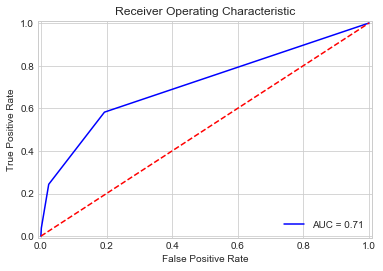

Accuracy: 87.21
Accuracy CV 10-Fold: 74.62
Running Time: 0:00:00.188873
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     38173
           1       0.15      0.28      0.20      4828

    accuracy                           0.75     43001
   macro avg       0.53      0.54      0.52     43001
weighted avg       0.81      0.75      0.78     43001

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2044
           1       0.40      0.26      0.32       263

    accuracy                           0.87      2307
   macro avg       0.66      0.60      0.62      2307
weighted avg       0.85      0.87      0.86      2307



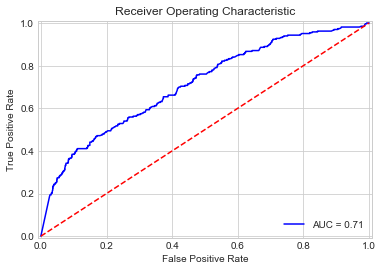

Accuracy: 88.86
Accuracy CV 10-Fold: 82.75
Running Time: 0:00:05.755574
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     38173
           1       0.12      0.09      0.10      4828

    accuracy                           0.83     43001
   macro avg       0.50      0.50      0.50     43001
weighted avg       0.80      0.83      0.81     43001

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2044
           1       0.61      0.06      0.12       263

    accuracy                           0.89      2307
   macro avg       0.75      0.53      0.53      2307
weighted avg       0.86      0.89      0.85      2307

Accuracy: 88.69
Accuracy CV 10-Fold: 82.6
Running Time: 0:00:00.640955
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     38173
           1       0.11      0.08      0.09      4828

    accuracy                           

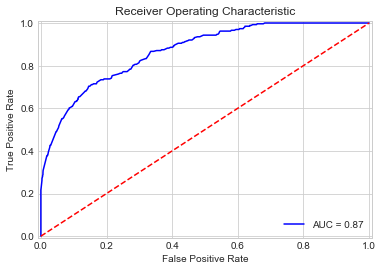

RandomizedSearchCV took 1.19 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.837 (std: 0.071)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 14}

Model with rank: 2
Mean validation score: 0.836 (std: 0.073)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.821 (std: 0.094)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 9, 'min_samples_split': 11}

Model with rank: 4
Mean validation score: 0.725 (std: 0.229)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 13}

Model with rank: 5
Mean validation score: 0.705 (std: 0.258)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'ma

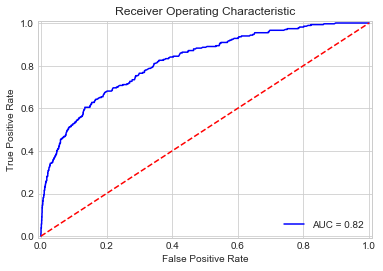

Accuracy: 88.99
Accuracy CV 10-Fold: 83.14
Running Time: 0:00:12.758118
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     38173
           1       0.14      0.10      0.12      4828

    accuracy                           0.83     43001
   macro avg       0.52      0.51      0.51     43001
weighted avg       0.81      0.83      0.82     43001

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2044
           1       0.60      0.11      0.18       263

    accuracy                           0.89      2307
   macro avg       0.75      0.55      0.56      2307
weighted avg       0.86      0.89      0.85      2307



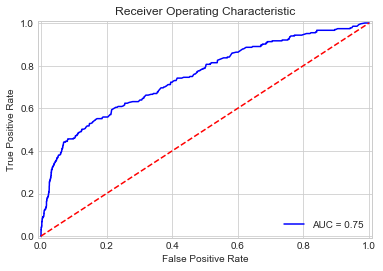

,Model,Score
6,Decision Tree,91.50
2,Random Forest,90.03
0,KNN,89.25
7,Gradient Boosting Trees,88.99
5,Linear SVC,88.86
4,Stochastic Gradient Decent,88.69
1,Logistic Regression,88.60
3,Naive Bayes,87.21


In [37]:
print (metrics.classification_report(y_test, test_pred_knn))
plot_roc_curve(y_test, probs_knn)

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian))
print (metrics.classification_report(y_test, test_pred_gaussian))
plot_roc_curve(y_test, probs_gau)


# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

print (metrics.classification_report(y_train, train_pred_svc))
print (metrics.classification_report(y_test, test_pred_svc))

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

print (metrics.classification_report(y_train, train_pred_sgd))
print (metrics.classification_report(y_test, test_pred_sgd))

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt)) 
plot_roc_curve(y_test, probs_dt)

# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf))

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt))
print (metrics.classification_report(y_test, test_pred_gbt)) 
plot_roc_curve(y_test, probs_gbt)

models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

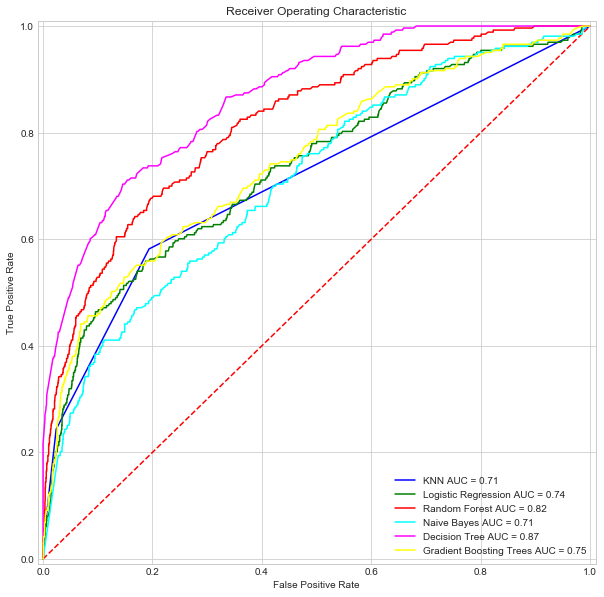

In [38]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()